In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='darkgrid')


In [2]:
# Import dataset
bike_data = pd.read_csv("SeoulBikeData.csv", encoding='ISO-8859-1')

df = bike_data.copy()
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## Data Preprocessing and Exploratory Data Analysis

In [3]:
# Check the shape of the data
df.shape

(8760, 14)

The dataset contains 14 columns and 8760 rows.

In [4]:
# Display a summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
# Check the data types of each column
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [6]:
## Statistical description of features
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
## Check for missing values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
# Investigate the unique values in the 'Seasons' column
df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [9]:
# Investigate the unique values in the 'Holidat' column
df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [10]:
# Investigate the unique values in the 'Functioning Day' column
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
# Convert the 'Date' variable to a datetime feature
df['Date']=pd.to_datetime(df['Date'],format="%d/%m/%Y")

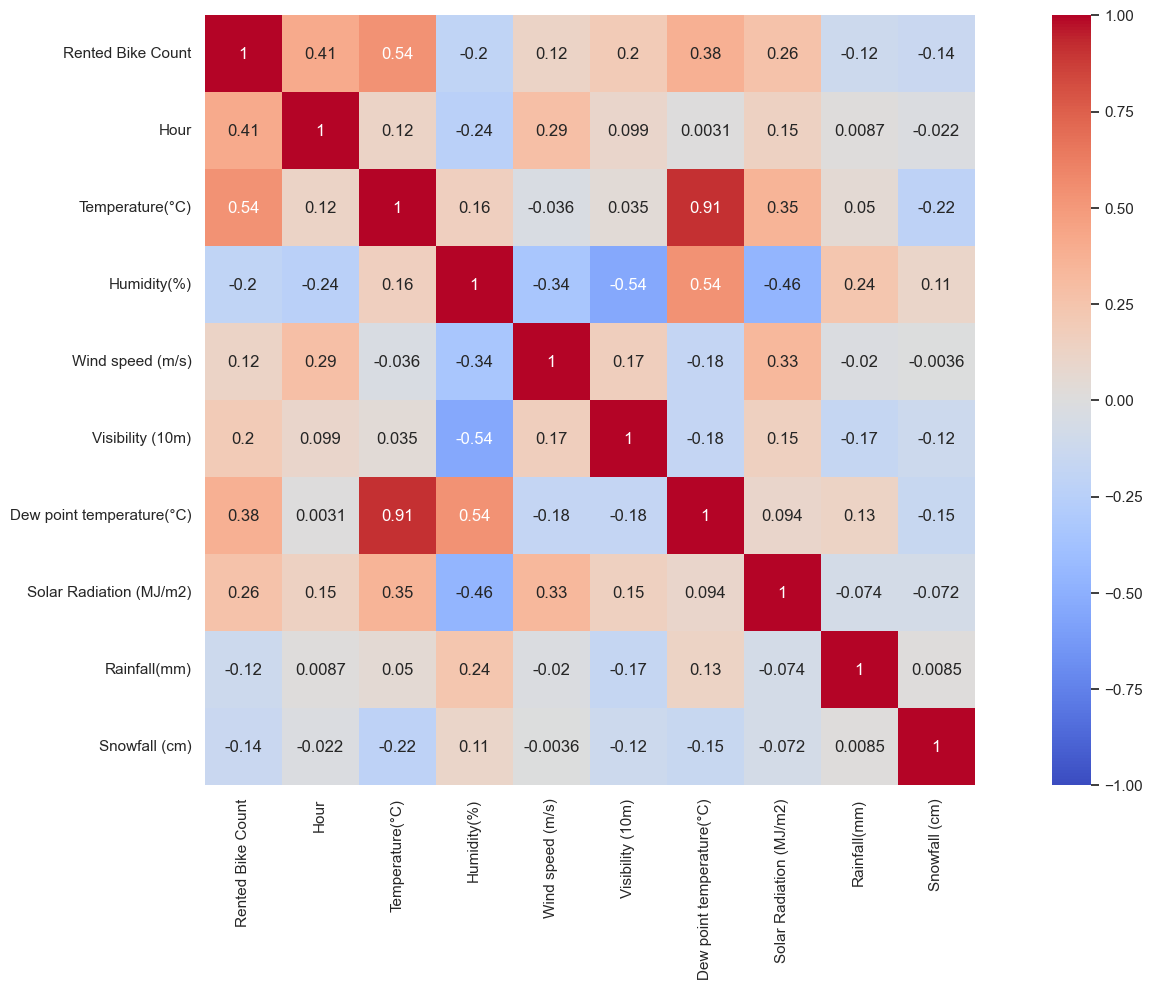

In [12]:
# Check correlation between the data
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

From the Correlation Matrix, we can see that the variables that are good predictors of the target variable(Rented Bike Count) are:
- Temperature
- Hour


There is a strong correlation between'Temperature(°C)' and 'Dew point temperature(°C) which suggests multicollinearity', so we can drop one of them.

In [13]:
df=df.drop(['Dew point temperature(°C)'],axis=1)

## Data Preparation and Visualization

## Creating new Variables

In [14]:
# Variable to inform us whether it is night or day, we assume night starts at 8PM-5AM and daytime otherwise
df['label_day_night']=df['Hour'].apply(lambda x : 'Night' if (x >=20 or x<=5) else( 'Day'))

In [15]:
# We create a column feature which gives the day of the week and the month corresponding to the date
df['WeekDay']=df["Date"].dt.day_name() 

df['Month']=df['Date'].dt.month

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,label_day_night,WeekDay,Month
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,12
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,12


## Plotting variables to the target

<AxesSubplot:xlabel='Date'>

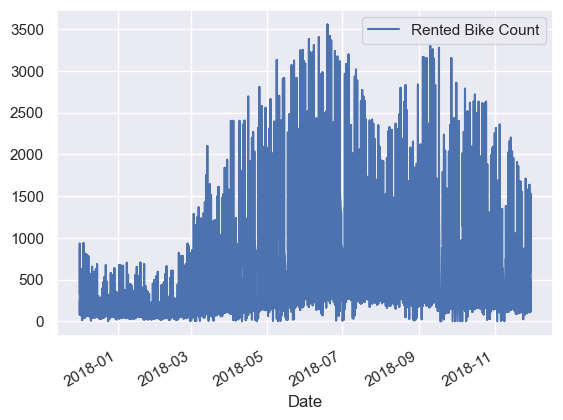

In [16]:
df.plot(x='Date',y='Rented Bike Count',kind='line') 


On this first plot, we see a high rise in bikes rent between April to August. Normally, summer falls within this months. 
<br><br>
So investigate the seasons and the total bike rents in each of them.

In [17]:
# Investigate each season and the total bike rents in them
df1VizSeasons=pd.DataFrame(df.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending=False))
df1VizSeasons.style.background_gradient(cmap=sns.light_palette("green", as_cmap=True))


,Rented Bike Count
Seasons,
Summer,2283234
Autumn,1790002
Spring,1611909
Winter,487169


<AxesSubplot:ylabel='Rented Bike Count'>

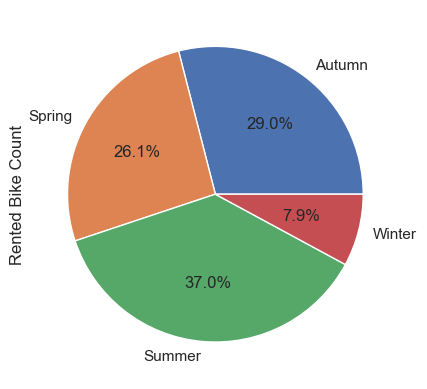

In [18]:
# Seasons and percentage of total bikes rented in them.
df.groupby('Seasons').sum()['Rented Bike Count'].plot.pie(autopct='%1.1f%%')

We can see that as we expected, summer is the season in which we have the most rents.
<br><br>
By general intuition, we know it's mostly sunny in summer seasons. Let's verify if higher bike rents in summer is linked to solar radiation. 

In [19]:
# Investigate each season and the solar radiation in them
df1VizSolarRadiation=pd.DataFrame(df.groupby('Seasons').sum()['Solar Radiation (MJ/m2)'].sort_values(ascending=False))
df1VizSolarRadiation.style.background_gradient(cmap=sns.light_palette("green", as_cmap=True))

,Solar Radiation (MJ/m2)
Seasons,
Summer,1680.850000
Spring,1520.840000
Autumn,1139.650000
Winter,644.070000


We can verify above that, summer has a higher solar radiation so it is possible that high bike rents in summer is due to clear and sunny weather.

<AxesSubplot:xlabel='Solar Radiation (MJ/m2)'>

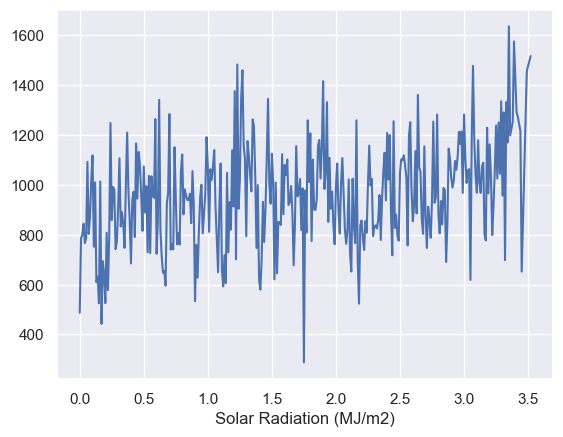

In [20]:
# Investgate the relationship between Solar radiation and the target variable
df.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot()


On average, bikes rents tends to increase when solar radiation is high and tends to increase when solar radiation is low.


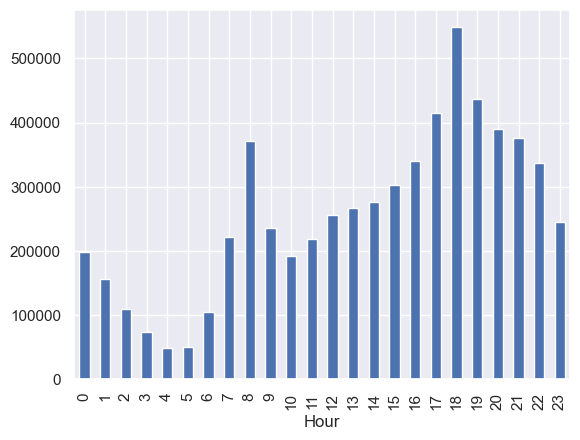

In [21]:
df.groupby('Hour').sum()['Rented Bike Count'].plot.bar().plot()
plt.show()

Here we have a repartition of the rents by hour. Bike rent tends to be low at the beginning of the day but very high when around late hours in the day. I suppose few people go to work by bike in the morning whilst most people rent bikes at late hours. <BR>
I also assume users of the bike system are mostly students or workers who usually go to school or work using other forms of transport which might be faster than bikes(since they do not want to be late). However, they use bikes to return home after work or school. <br>
Generally, I suppose bikes are used as a form of transport to and from workplace and schools.

In [22]:
# Let's investigate the rent of bikes during the different weekdays.
df1VizDays=pd.DataFrame(df.groupby('WeekDay').sum()['Rented Bike Count'].sort_values(ascending=False))
df1VizDays.style.background_gradient(cmap=sns.light_palette("green", as_cmap=True))

,Rented Bike Count
WeekDay,
Friday,950334
Wednesday,923956
Monday,911743
Saturday,885492
Thursday,861999
Tuesday,858596
Sunday,780194


Bike rent is highest on weekdays. However, total bike rent on sunday(a weekend) is relatively lower than week days. 
So I suppose people rent bikes to go to work or school.

<AxesSubplot:xlabel='Temperature(°C)'>

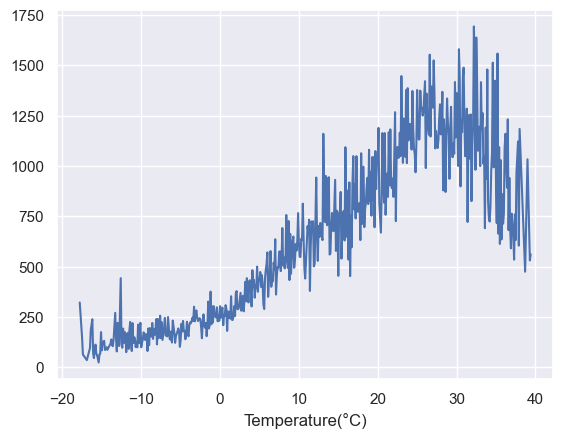

In [23]:
# Investigate the rent of bikes in relation to Temperature.
df.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

We have high bike rent when temperature is high and  low rent when temperature is low. <br>
Therefore, our assumption that bike rent is high during warm seasons can be confirmed here since the temperature in those seasons are relatively warm as well. 

<AxesSubplot:ylabel='Rented Bike Count'>

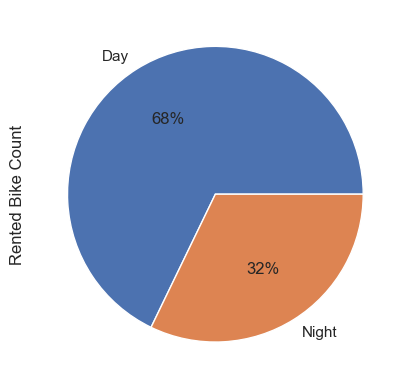

In [24]:
## Let's see the repartition of bike rents following moment of a day
df.groupby('label_day_night').sum()['Rented Bike Count'].plot.pie(autopct='%1.0f%%')


Bike rent during day-time has a higher percentage than bike rents in night-time

<AxesSubplot:ylabel='Rented Bike Count'>

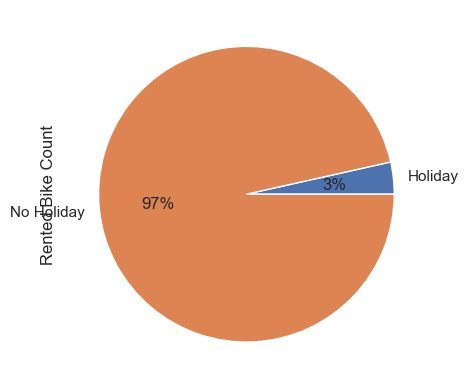

In [25]:
# Investigate bike rent during holidays 
df.groupby('Holiday').sum()['Rented Bike Count'].plot.pie(autopct='%1.0f%%')


Looking at the graph, a large percentage of bike rent(97%) are during days that are No Holidays. <br>

This evidence can support my earlier assumption that most people rent bikes as a means of transport to and from school and workplace.


<AxesSubplot:xlabel='Rainfall(mm)'>

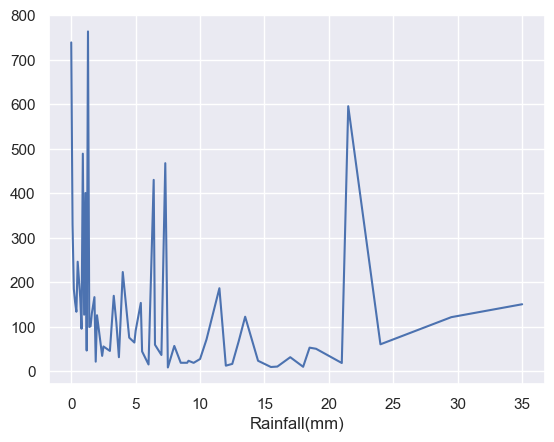

In [26]:
# Let's investigate the rent of bikes following rainfall
df.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot()

It can be inferred from the graph that bike rents are usually low when there is high rainfall and high rent when there is little or no rainfall.
However, there are times when rainfall is high people rent more bikes too(between 21-24mm).

In [27]:
# This rise between 21 and 24 mm of rainfall seems very contradictory, so let's investigate this

df.loc[(df['Rainfall(mm)']>=21)&(df['Rainfall(mm)']<=24)]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,label_day_night,WeekDay,Month
5034,2018-06-28,596,18,20.6,97,0.7,222,0.14,21.5,0.0,Summer,No Holiday,Yes,Day,Thursday,6
5132,2018-07-02,61,20,23.5,97,0.1,1814,0.04,24.0,0.0,Summer,No Holiday,Yes,Night,Monday,7
6524,2018-08-29,19,20,23.4,98,0.6,70,0.00,21.0,0.0,Summer,No Holiday,Yes,Night,Wednesday,8


We can see that these days of rainfall are in the summer and the Temperature (°C) is high. I suppose an unexpected rain or a 'sunshower' occured at these particular times, causing people to order bikes to rush home, hence the high demand in these hours.

<AxesSubplot:xlabel='Snowfall (cm)'>

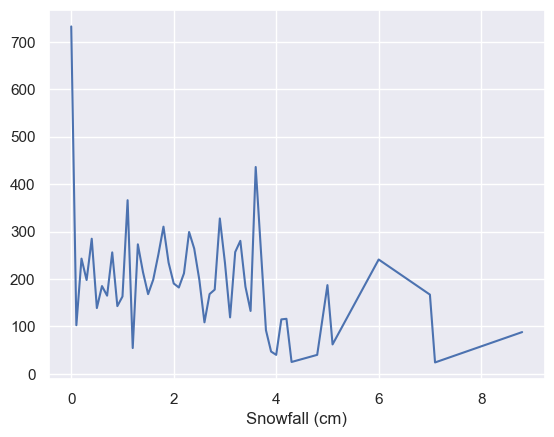

In [28]:
# Let's investigate the rent of bikes following snowfall.
df.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()

Bike rent tends to be high when there is no snowfall. Demand however turns to decrease when snowfall increases.

## ML Model Building Process

In [29]:
# Encode days of the week to numerical values
mapping_dictDay={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
df['WeekDay']=df['WeekDay'].map(mapping_dictDay)



In [30]:
# Encode seasons to numerical values
seasons =  {'Spring':1,'Summer':2,'Autumn':3,'Winter':4}
df['Seasons'] = df['Seasons'].map(seasons)

In [31]:
# Encode Holiday, Function Day, label_day_night to numerical values using One Hot Encoding
df = pd.get_dummies(df, columns=['Holiday', 'Functioning Day', 'label_day_night'], drop_first=True)
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,WeekDay,Month,Holiday_No Holiday,Functioning Day_Yes,label_day_night_Night
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,4,5,12,1,1,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,4,5,12,1,1,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,4,5,12,1,1,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,4,5,12,1,1,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,4,5,12,1,1,1


In [32]:
# Drop the 'Date' column 
df.drop(['Date'],axis =1, inplace=True)
df.shape

(8760, 15)

In [33]:
df.tail()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,WeekDay,Month,Holiday_No Holiday,Functioning Day_Yes,label_day_night_Night
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,3,5,11,1,1,0
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,3,5,11,1,1,1
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,3,5,11,1,1,1
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,3,5,11,1,1,1
8759,584,23,1.9,43,1.3,1909,0.0,0.0,0.0,3,5,11,1,1,1


In [34]:
X = df.drop(['Rented Bike Count'], axis=1)
y = df['Rented Bike Count']

## Model Building

In [35]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
import math

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [37]:
# RMSE and R-squared is used to evaluate the performance of our ML models.
# Create an object to report the results
reporting_r2={}

## Decision Tree

In [38]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)

# make predictions
dt_pred = dt.predict(X_test)

# Calculate the R2 score
R2_score_dt = r2_score(y_test, dt_pred)*100

# print R2
print("R2 Score: %.2f "% R2_score_dt )




R2 Score: 86.07 


In [39]:
# %%time

# dt_param = {    'criterion': ['squared_error','absolute_error'],
#                 'max_depth': [1, 2, 4, 6, 8,10,12,14,16, 18, 20],
#                 'min_samples_split': [2, 4, 6],
#            }

# # Define the estimator with GridSearchCV parameters
# dt_gridsearch =GridSearchCV(estimator=dt,
#                             param_grid=dt_param,
#                             cv=5, 
#                             scoring='r2', 
#                             refit=True,
#                             n_jobs=-2)

# dt_gridsearch.fit(X_train,y_train)

# # Use the best estimator to make predictions on the testing set
# dt_best_estimator = dt_gridsearch.best_estimator_
# dt_pred_gridsearch = dt_best_estimator.predict(X_test)

# # Calculate the R2 using the best estimator
# r2_dt_gridsearch = r2_score(y_test, dt_pred_gridsearch)*100

# # print R2 using the best_estimator
# print("R2 Score using GridSearchCV: %.2f "% r2_dt_gridsearch )


In [40]:
reporting_r2['Decision Tree Regressor']=R2_score_dt
# reporting_r2['Decision Tree Regressor']=r2_dt_gridsearch


## Random Forest Regressor

In [41]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)

# make predictions
rf_pred = rf.predict(X_test)

# Calculate the R2 score
R2_score_rf = r2_score(y_test, rf_pred)*100

# print R2
print("R2 Score: %.2f "% R2_score_rf )


R2 Score: 92.83 


In [43]:
# %%time
# # make a dictionary of hyparameter values to search
# rf_param = {'criterion': ['squared_error', 'absolute_error', 'poisson'],
#             'n_estimators': [100, 200, 300],
#             'max_depth': [5, 10, 15],
#             }

# # Define the estimator with GridSearchCV parameters
# rf_gridsearch =GridSearchCV(estimator=rf,
#                             param_grid=rf_param,
#                             cv=5, 
#                             scoring='r2', 
#                             refit=True,
#                             n_jobs=-1)

# rf_gridsearch.fit(X_train,y_train)

# # Use the best estimator to make predictions on the testing set
# rf_best_estimator = rf_gridsearch.best_estimator_
# rf_pred_gridsearch = rf_best_estimator.predict(X_test)

# # Calculate the R2 using the best estimator
# r2_rf_gridsearch = r2_score(y_test, rf_pred_gridsearch)*100

# # print R2 using the best_estimator
# print("R2 Score using GridSearchCV: %.2f "% r2_rf_gridsearch )


In [ ]:
reporting_r2['Random Forest Regressor']=R2_score_rf
# reporting_r2['Random Forest Regressor']=r2_rf_gridsearch


## XGBoost

In [114]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

#make predictions
xgb_pred = xgb.predict(X_test)

# Calculate the R2 score
R2_score_xgb = r2_score(y_test, xgb_pred)*100

# print R2
print("R2 Score: %.2f "% R2_score_xgb )

R2 Score: 93.59 


In [115]:
xgb_param = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Define the estimator with GridSearchCV parameters
xgb_gridsearch = GridSearchCV(estimator=xgb, 
                              param_grid=xgb_param,
                              refit=True,
                              scoring='r2', 
                              cv=5,
                              n_jobs=-1)

xgb_gridsearch.fit(X_train,y_train)

# Use the best estimator to make predictions on the testing set
xgb_best_estimator = xgb_gridsearch.best_estimator_
xgb_pred_gridsearch = xgb_best_estimator.predict(X_test)

# Calculate the R2 using the best estimator
r2_xgb_gridsearch = r2_score(y_test, xgb_pred_gridsearch)*100

# print R2 using the best_estimator
print("R2 Score using GridSearchCV: %.2f "% r2_xgb_gridsearch )


R2 Score using GridSearchCV: 94.49 


In [116]:
reporting_r2['XGBoost']=r2_xgb_gridsearch


## Results

In [117]:
# R2 Results
df_results=pd.DataFrame()
df_results['Model']=reporting_r2.keys()
df_results['R2 Score']=reporting_r2.values()

df_results=df_results.set_index('Model')


In [118]:
dfVizModels=pd.DataFrame(df_results['R2 Score'].sort_values(ascending=False))
dfVizModels.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,R2 Score
Model,
XGBoost,94.492507
Random Forest Regressor,92.828849
Decision Tree Regressor,86.074587


From the results above, it is evident that the Extra Tree regressor is the best performing model.

## Feature Importance

In [119]:
importances = rf.feature_importances_

# view the feature scores
feature_scores = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
feature_scores

Temperature(°C)            0.309607
Hour                       0.286504
Solar Radiation (MJ/m2)    0.090435
Functioning Day_Yes        0.088919
Humidity(%)                0.071185
Rainfall(mm)               0.042553
WeekDay                    0.036886
Seasons                    0.023681
Month                      0.021216
Visibility (10m)           0.010557
Wind speed (m/s)           0.010308
Holiday_No Holiday         0.005685
label_day_night_Night      0.001852
Snowfall (cm)              0.000613
dtype: float64

## Visualize the feature scores

<AxesSubplot:>

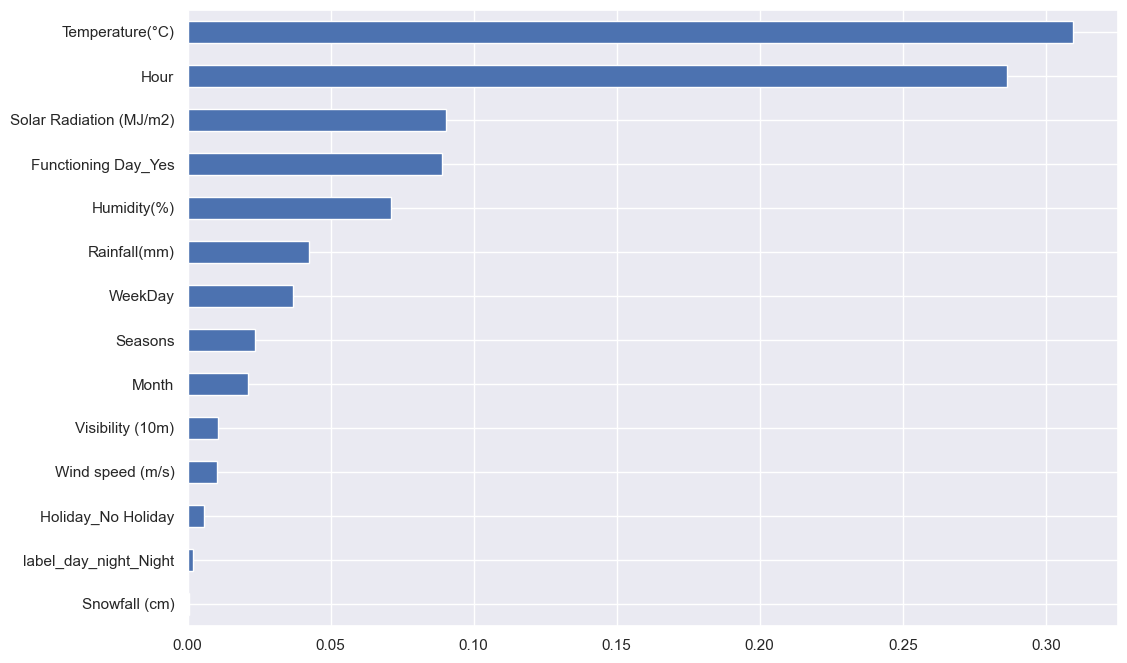

In [120]:
importances = pd.Series(rf.feature_importances_,index=X.columns)
importances.sort_values().plot(kind='barh', 
                 figsize=(12,8))

It is evident from the graph that, the temperature and Hour of the day are the most important features and Snowfall is the least important feature

## Save Model

In [138]:
import pickle

# Save the model as a pickle file
with open('model.pkl', 'wb') as f:
    pickle.dump(xgb_gridsearch, f)

In [139]:
# Load the saved model
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [140]:
# Use the loaded model to make predictions
y_pred = model.predict(X_test)

In [141]:
X_test.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,WeekDay,Month,Holiday_No Holiday,Functioning Day_Yes,label_day_night_Night
6056,8,27.2,69,1.8,1999,0.70,0.0,0.0,2,5,8,1,1,0
5556,12,32.6,51,2.1,800,3.21,0.0,0.0,2,5,7,1,1,0
5990,14,34.0,50,1.2,1744,1.68,0.0,0.0,2,2,8,1,1,0
7674,18,16.9,47,1.4,1637,0.11,0.0,0.0,3,2,10,1,1,0
3319,7,6.4,51,1.0,1398,0.19,0.0,0.0,1,3,4,1,1,0


In [152]:
predictions_series = pd.Series(y_pred, index=X_test.index)
verification_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_series})
print(verification_df.head())

      Actual    Predicted
6056    1728  1851.937134
5556     822   786.090759
5990     658   674.738708
7674    2716  2456.317139
3319    1083   991.829163


In [153]:
input_data = np.array([[8, 27.2, 69, 1.8, 1999, 0.70, 0.0, 0.0, 2, 5, 8, 1, 1, 0]])  # Replace with your actual input data
predictions = model.predict(input_data)
print(predictions)

[1851.9371]
